# Three-Dimensional Plotting

Matplotlib mostly designed with two dimensions in mind.

3D utilities build on top of 2D functionality.

Convenient but limited toolset provided.

Import as follows:

In [1]:
from mpl_toolkits import mplot3d

To create a 3-dimensional axes pass the keyword `projection='3d'` to any of the normal axes creation routines.

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

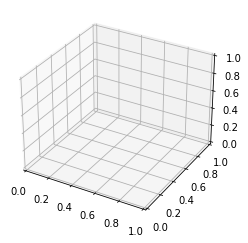

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Three-dimensional Points and Lines

A basic three-dimensional plot is either a line

Collection of scatter plots from an (x, y, z) set of triples.

`ax.plot3D` and `ax.scatter3D` functions relate to the above.

Nearly identical call signatures as the 2D counterparts.

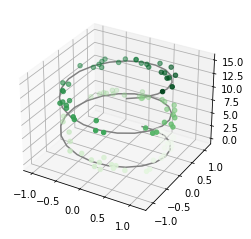

In [29]:
%matplotlib inline

ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 50)    # (0,0, number of point)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

# Three-dimensional Contour Plots

Again, similar to the contour plots we've explored previously.

2D: `ax.contour`

3D: `ax.contour3D`

Inclusion of Z data for each point. 

In [30]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

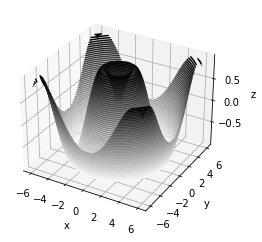

In [31]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

The viewing angle sometimes isn't optimal.

`view_init` can set the elevation and azimuthal angles.

E.g 

- 60 degrees elevation (60 degrees above the x-y plane)

- An azimuth of 35 degrees (rotated 35 degrees counter clockwise around the z-axis)

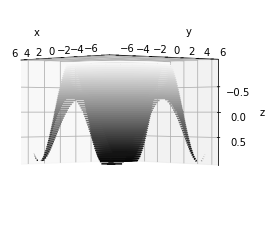

In [37]:
ax.view_init(180,40)
fig

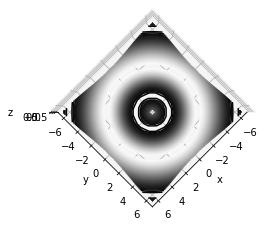

In [40]:
ax.view_init(90,45)
fig

# Wireframes and Surface Plots

Take a grid of values as input.

Project onto a 3D surface.

3D form quite easy to visualise.

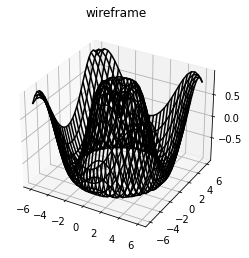

In [41]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

Surface plot similar to wireframe.

Each face is a filled polygon.

You can add a colormap to the filled polygons to aid perception of the topology ofthe surface being visualised:

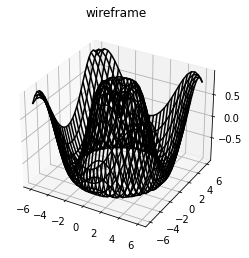

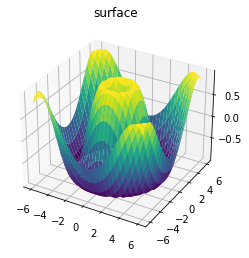

In [42]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');
fig

# Surface Triangulations

For some applications the evenly sampled grids is overly restrictive and inconvenient.

Given this, triangulation-based plots can be very useful.

So, instead of an even draw from a Cartesian grid, we have a random set of draws:

In [43]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

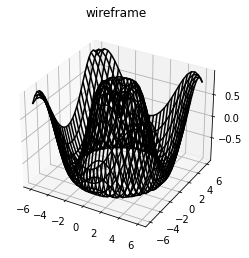

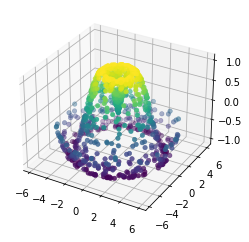

In [44]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);
fig

This plot is ok, but could be better by considering the set of triangles formed between adjacent points.

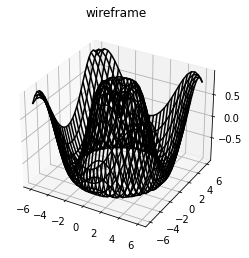

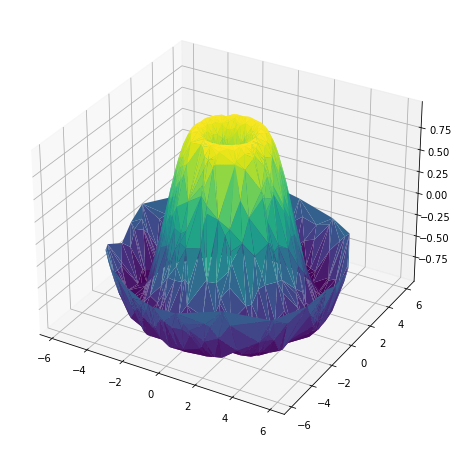

In [46]:
%matplotlib inline
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none')
fig

# Example: Visualising a Möbius strip

A Möbius strip is similar to a strip of paper glued into a loop with a half-twist. 

Topologically, it's quite interesting because despite appearances it has only a single side! 

The key to creating the Möbius strip is to think about it's parametrization: 

- it's a two-dimensional strip
- so we need two intrinsic dimensions:

    - $\theta$, which ranges from $0$ to $2\pi$ around the loop
    - $w$ which ranges from -.25 to .25 across the width of the strip

In [45]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, .25, 8)
w, theta = np.meshgrid(w, theta)

There are two rotations happening: 

- one is the position of the loop about its centre (what we've called $\theta$)
- The other is the twisting of the strip about its axis (we'll call this $\phi$). 

For a Möbius strip, we must have the strip makes half a twist during a full loop, or $\Delta\phi = \Delta\theta/2$.

In [14]:
phi = 0.5 * theta

Now we use our recollection of trigonometry to derive the three-dimensional embedding.

We'll define $r$, the distance of each point from the center, and use this to find the embedded $(x, y, z)$ coordinates:

In [47]:
# radius in x-y plane
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

Finally, we must ensure the triangulation is correct:

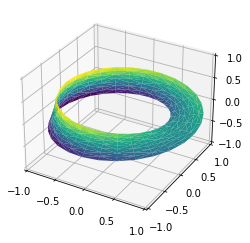

In [48]:
# triangulate in the underlying parametrization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='viridis', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);

# Summary:

3D plotting builds upon the standard 2D method calls by accepting Z coordinates.

Wireframes and surface plots are interesting ways of visualising 3D data.